# Business Case

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:- Explore football skills and cluster football players based on their attributes.

Task3:- Explore the data and attempt all the below asked questions in a
step by step manner:

     ● Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?
     
     ● Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?
     
     ● Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger? 

## 1. Importing Libraries

In [1]:
# Importing Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Collection
data = pd.read_csv('players_20.csv')

In [3]:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [4]:
data.shape

(18278, 104)

In [5]:
data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [8]:
data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

# Domain Analysis

## Attributes' Information

●	Name: Name of the player. 

●	Age: Age of the player.

●	Height: Height of the player in inches (transformed to centimeters in preprocessing).

●	Overall: General performance quality and value of the player representing the key positional skills and international reputation rated between 1-99. Overall attribute is used only in preprocessing and discussion stages because using it in modelling could lead to domination by this feature. The aim of the project is not basically sort and categorize the players using their overall talent and international reputation, but to cluster them based on using their whole skillset.

●	Potential: Maximum Overall rating expected to be reached by a player in the top of his career rated between 1-99.

●	PreferredFoot: Right or Left. Label encoder is applied as 0 for left and 1 for right.

●	WeakFoot: Represents how well a player uses his weak foot (e.g. left for righties) rated between 1 to 5.

●	WorkRate: Degree of the effort the player puts in terms of attack and defense rated as low, medium and high. This feature is divided into two new features as AttackWorkRate and DefenseWorkRate. Besides, label encoder is applied as 0 for low, 0.5 for medium and 1 for high.

●	Position: Position of the players on the pitch which determines their roles and responsibilities in the team. Forward positions in the football and FIFA 19 can be grouped as striker (ST: center striker, RS: right striker, LS: left striker), forward (CF: center forward, RF: right forward, LF: left forward) and winger (RW: right winger, LW: left winger). The word, forward, is used both as a general term and a special position. Strikers are positioned in front of forwards and wingers and very closed to the opposing goal. Their main responsibilities are attacking and scoring goals, that’s why their ball control, shooting and finishing skills are expected to be well. Center forwards are positioned right behind the strikers. They are expected to receive balls from the others and score assists to the others or goals. In addition to the skills expected from strikers, they have to be good at passing. Right forwards and left forwards are positioned at the right and left of the center forwards with the same expectations. Wingers are positioned near the touchlines to create chances for strikers and forwards from the right and left side of the field by breakthrough and crosses and to score goals. They are expected to be good at dribbling, acceleration, passing and crossing. Positions are used only in preprocessing and discussion stages. 

●	ST: Positional skill. Player’s general ability when playing in ST position rated between 1-99.

●	RS: Positional skill. Player’s general ability when playing in in RS position rated between 1-99.

●	LS: Positional skill. Player’s general ability when playing in in LS position rated between 1-99.

●	CF: Positional skill. Player’s general ability when playing in in CF position rated between 1-99.

●	RF: Positional skill. Player’s general ability when playing in in RF position rated between 1-99.

●	LF: Positional skill. Player’s general ability when playing in in LF position rated between 1-99.

●	RW: Positional skill. Player’s general ability when playing in in RW position rated between 1-99.

●	LW: Positional skill. Player’s general ability when playing in in LW position rated between 1-99.

●	Crossing: Crossing skill of the player rated between 1-99. Cross is a long-range pass from wings to center.

●	Finishing: Finishing skill of the player rated between 1-99. Finishing in football refers to finish an attack by scoring a goal.

●	HeadingAccuracy: Player’s accuracy to pass or shoot by using his head rated between 1-99.

●	ShortPassing: Player’s accuracy for short passes rated between 1-99.

●	LongPassing: Player’s accuracy for long passes rated between 1-99.

●	Dribbling: Dribbling skill of the player rated between 1-99. Dribbling is carrying the ball without losing while moving in one particular direction.

●	SprintSpeed: Speed rate of the player rated between 1-99.

●	Acceleration: Shows how fast a player can reach his maximum sprint speed rated between 1-99.

●	FKAccuracy: Player’s accuracy to score free kick goals rated between 1-99.

●	BallControl: Player’s ability to control the ball rated between 1-99.

●	Balance: Player’s ability to remain steady while running, carrying and controlling the ball rated between 1-99.

●	ShotPower: Player’s strength level of shooting the ball rated between 1-99.

●	Jumping: Player’s jumping skill rated between 1-99.

●	Penalties: Player’s accuracy to score goals from penalty rated between 1-99.

●	Strength: Physical strength of the player rated between 1-99.

●	Agility: Gracefulness and quickness of the player while controlling the ball rated between 1-99.

●	Reactions: Acting speed of the player to what happens in his environment rated between 1-99.

●	Aggression: Aggression level of the player while pushing, pulling and tackling rated between 1-99.

●	Positioning: Player’s ability to place himself in the right position to receive the ball or score goals rated between 1-99.

●	Vision: Player’s mental awareness about the other players in the team for passing rated between 1-99.

●	Volleys: Player’s ability to perform volleys rated between 1-99.

●	LongShots: Player’s accuracy of shoots from long distances rated between 1-99.

●	Stamina: Player’s ability to sustain his stamina level during the match rated between 1-99. Players with lower stamina get tired fast.

●	Composure: Player’s ability to control his calmness and frustration during the match rated between 1-99.

●	Curve: Player’s ability to curve the ball while passing or shooting rated between 1-99.

●	Interceptions: Player’s ability to intercept the ball while opposite team’s players are passing rated between 1-99. It is a defensive skill.

●	StandingTackle: Player’s ability to perform tackle (take the ball from the opposite player) while standing rated between 1-99. It is a defensive skill.
●	SlidingTackle: Player’s ability to perform tackle by sliding rated between 1-99. It is a defensive skill.

●	Marking: Player’s ability to apply strategies to prevent opposing team from taking the ball rated between 1-99. It is a defensive skill.  


# Exploratory data analysis

In [9]:
# To display all the columns
data.columns.values

array(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall',
       'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes',
       'gk_speed', 'gk_positioning', 'player_traits',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'mo

In [10]:
# To display all the numerical columns
data.describe().columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positionin

In [11]:
df = data[['age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]

In [12]:
df

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,22,186,79,48,56,40000,2000,1,3,2,70000.0,36.0,2019.0,NaN,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14
18274,22,177,66,48,56,40000,2000,1,2,2,72000.0,31.0,2022.0,NaN,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9
18275,19,186,75,48,56,40000,1000,1,2,2,70000.0,38.0,2019.0,NaN,54.0,35.0,44.0,45.0,48.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14
18276,18,185,74,48,54,40000,1000,1,2,2,70000.0,33.0,2022.0,NaN,59.0,35.0,47.0,47.0,45.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13


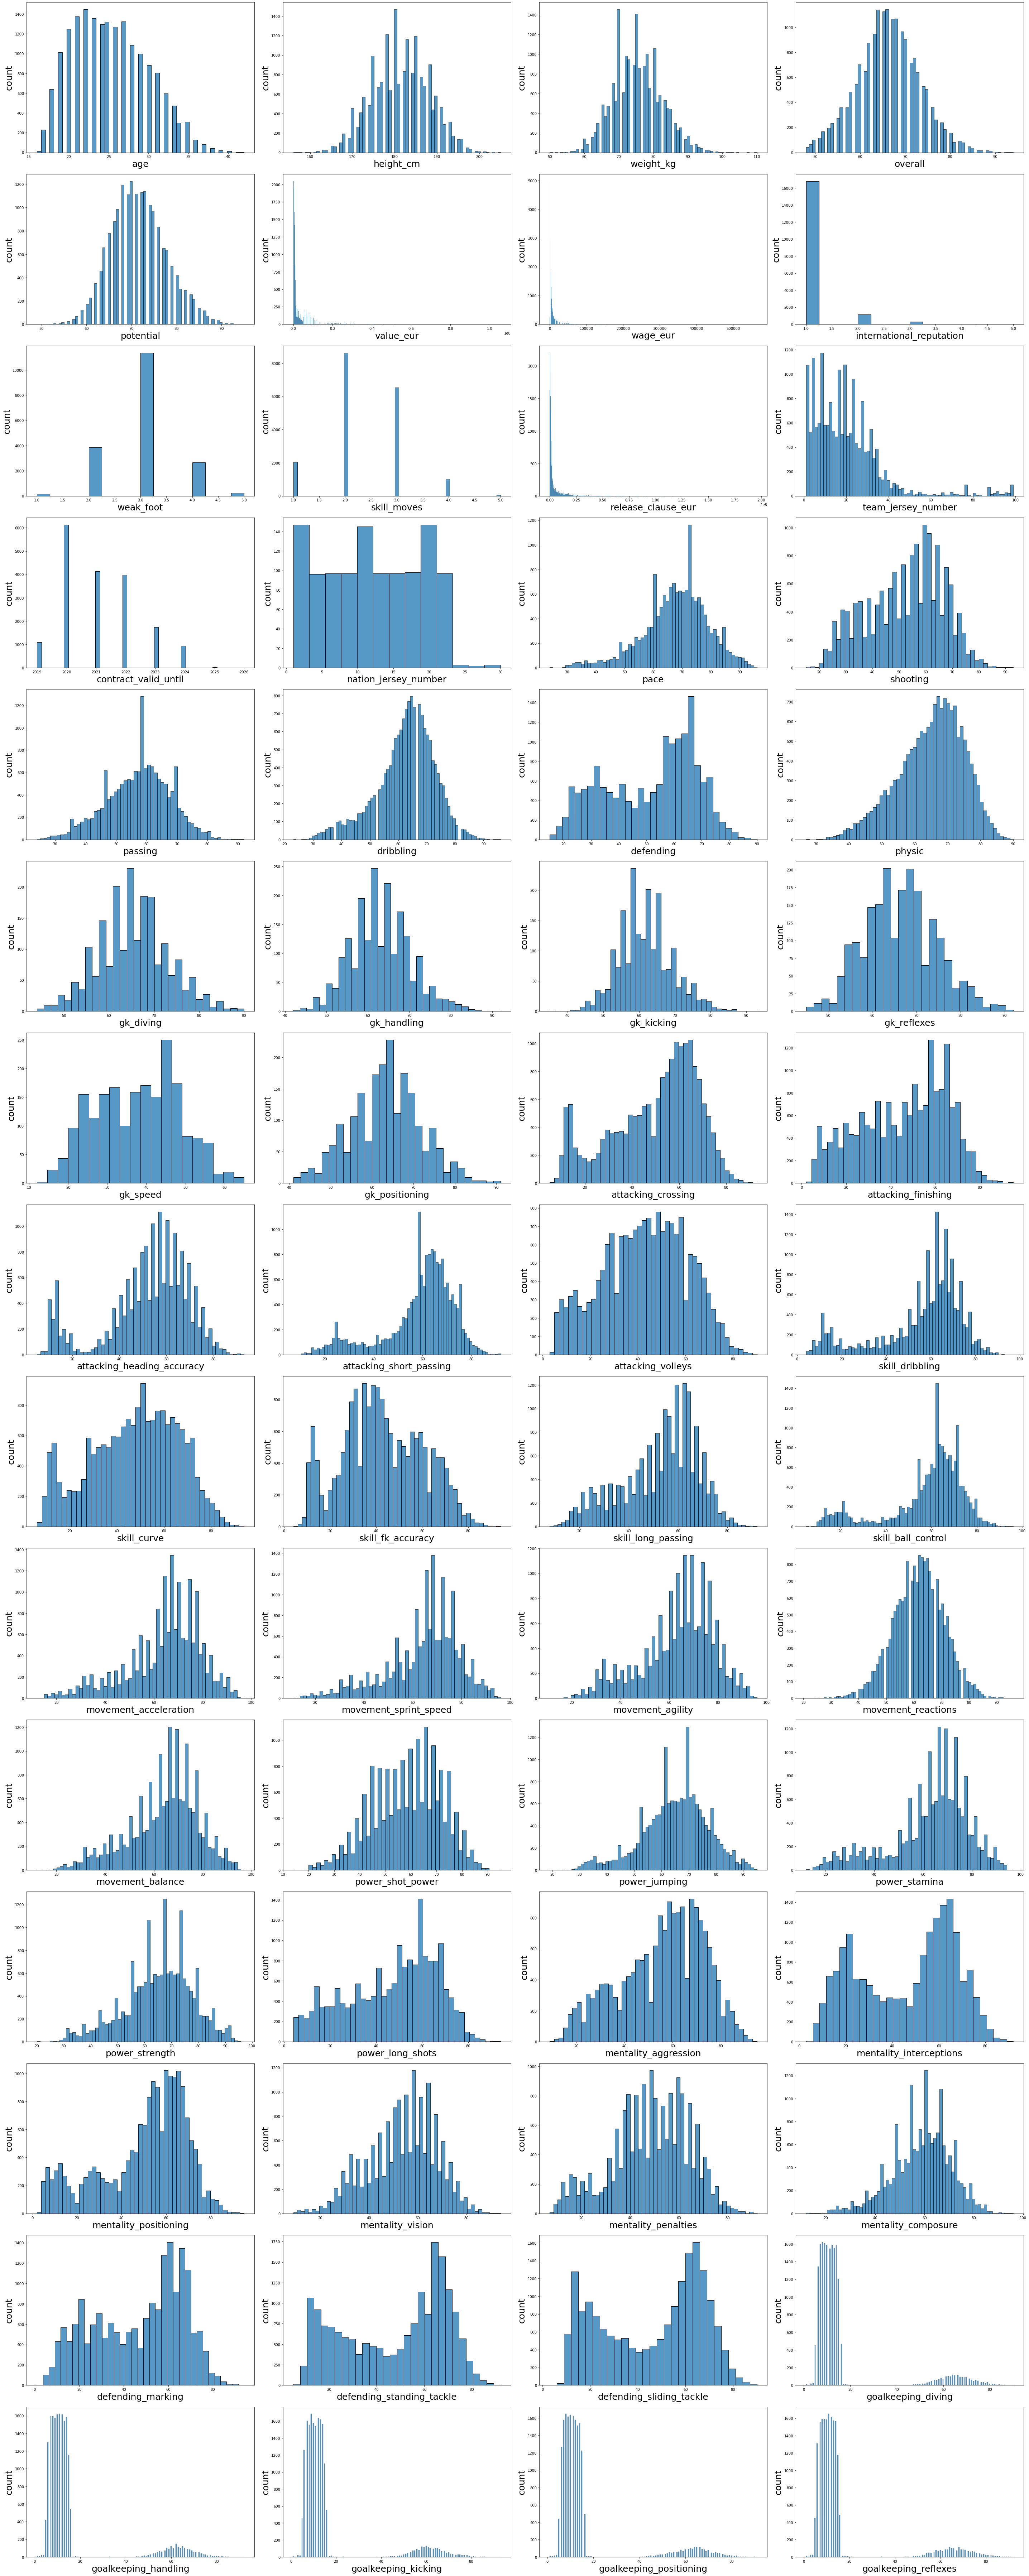

In [13]:
plt.figure(figsize=(40,100))
plotnumber = 1
for column in df:
    ax = plt.subplot(15,4,plotnumber)
    sns.histplot(x=df[column])
    plt.xlabel(column,fontsize=25)
    plt.ylabel('count',fontsize=25)
    plotnumber+=1
plt.tight_layout()
plt.show()

## Insights from above histplots

* Age:- Maximum number of players are between the age 20 to 25 
        very few players are survive after 35
* Height_cm:- Maximum number of player's hieght lies between 170 to 190, very few players haight is above 190cm.


* weight_kg:- Maximum number of player's weight lies between 65 to 85, very few players weight is above 90kg.
              70kg is the highest number of player's weight.
              
* overall:- it looks almost normal distribution, overall performance of maximum players lies between 60 to 75 out of 99
            there are some players who has overall performance below 60 also, and very few players have their overall performance above 90 like Messi and Ronaldo
* potential:- this plot also looks almost normal distribution, potential of maximum players lies between 65 to 80, some player's potential is above 80 and very few players potential is above 90 out of 99


* As we can see in other plots also maximum number of player's characterstics lies in middle range and very few players overall performance, characterstics and stimina is excellent. 

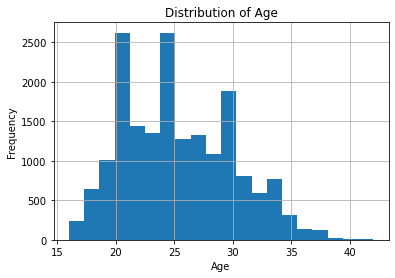

In [14]:
df['age'].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

**Pair Plot of Age, Overall, Value, and Wage**

<Figure size 1800x1800 with 0 Axes>

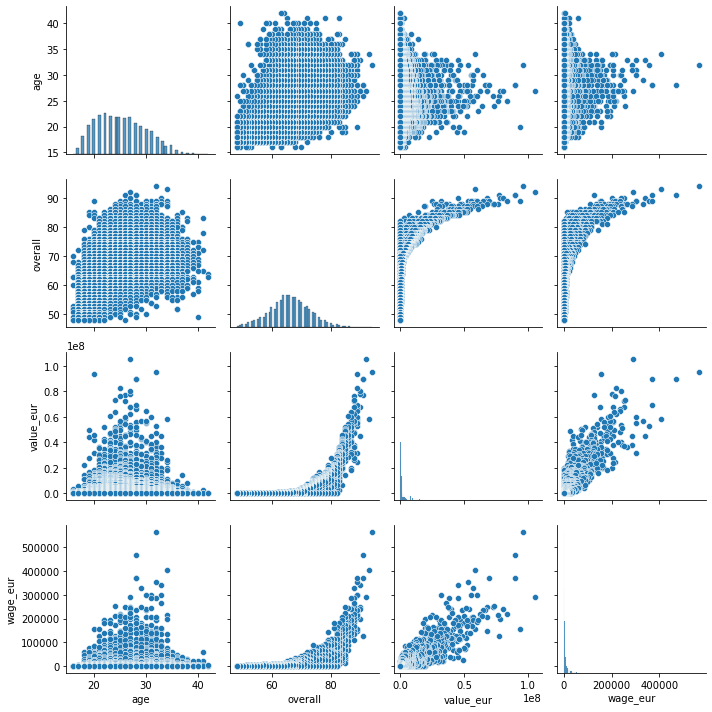

In [15]:
plt.figure(figsize=(25,25),facecolor = 'white')
sns.pairplot(df[['age', 'overall', 'value_eur', 'wage_eur']])
plt.tight_layout()
plt.show()

## Insights from pairplot

* overall vs wage_eur
* overall vs value_eur
* value_eur vs overall 
* wage_eur vs overall 

Above four plots tells us the same thing. whoever have overall performance above 80 their salary and estimated value of a football player is increasing.

* age vs wage_eur: players in the age of between 25 to 35 have highest wages.

* age vs value_eur: players in the age of between 20 to 35 have the highest value

In [16]:
correlation_matrix = df.corr()
print(correlation_matrix)

                                 age  height_cm  weight_kg   overall  \
age                         1.000000   0.081391   0.237169  0.464305   
height_cm                   0.081391   1.000000   0.768816  0.039945   
weight_kg                   0.237169   0.768816   1.000000  0.156522   
overall                     0.464305   0.039945   0.156522  1.000000   
potential                  -0.262872  -0.002432  -0.011738  0.646650   
value_eur                   0.081513   0.009527   0.051782  0.638230   
wage_eur                    0.151031   0.019547   0.065946  0.573578   
international_reputation    0.259582   0.037935   0.090854  0.475557   
weak_foot                   0.073988  -0.175200  -0.128568  0.230276   
skill_moves                 0.045277  -0.429980  -0.352060  0.401261   
release_clause_eur          0.065748   0.010941   0.048097  0.631286   
team_jersey_number         -0.225014  -0.032257  -0.081534 -0.192031   
contract_valid_until       -0.122691  -0.013972  -0.027106  0.15

## Data Preprocessing

In [17]:
df.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [18]:
df.shape

(18278, 60)

In [19]:
df.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.000000,55.000000,56.000000,56.000000,48.000000,58.000000,56.000000,58.00000

In [20]:
pd.set_option('display.max_rows',100)
# checking for null values
df.isnull().sum()

age                               0
height_cm                         0
weight_kg                         0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
international_reputation          0
weak_foot                         0
skill_moves                       0
release_clause_eur             1298
team_jersey_number              240
contract_valid_until            240
nation_jersey_number          17152
pace                           2036
shooting                       2036
passing                        2036
dribbling                      2036
defending                      2036
physic                         2036
gk_diving                     16242
gk_handling                   16242
gk_kicking                    16242
gk_reflexes                   16242
gk_speed                      16242
gk_positioning                16242
attacking_crossing                0
attacking_finishing         

**There are some null values in 16 features**

In [21]:
# Replacing null values with their mean
df= df.fillna(df.mean())

In [22]:
df.isnull().sum()

age                           0
height_cm                     0
weight_kg                     0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
international_reputation      0
weak_foot                     0
skill_moves                   0
release_clause_eur            0
team_jersey_number            0
contract_valid_until          0
nation_jersey_number          0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
gk_diving                     0
gk_handling                   0
gk_kicking                    0
gk_reflexes                   0
gk_speed                      0
gk_positioning                0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dr

## Scaling

In [23]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_df = scale.fit_transform(df)

In [24]:
data123 = pd.DataFrame(scaled_df, columns=df.columns)

In [25]:
data123

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,1.442333,-1.681598,-0.464891,3.993662,3.657156,16.653625,26.019375,10.285902,1.588459,2.133237,17.972160,-0.612587,-0.089430,-2.125941e-15,1.812202e+00,3.002116,3.543682e+00,3.452160e+00,-0.811077,1.220971e-01,5.505164e-15,-1.175852e-14,-8.505750e-15,5.223099e-15,2.002507e-15,7.562163e-15,2.089048,2.521670,1.020116,2.265238,2.552950,2.187351,2.479269,2.942162,2.573203,2.242225,1.775056,1.319040,1.991837,3.639424,2.193028,2.087565,0.257408,0.756079,0.220611,2.442165,-0.447066,-0.307108,2.241961,2.894270,1.694500,3.154006,-0.689317,-0.492949,-0.924093,-0.596066,-0.315057,-0.073010,-0.138191,-0.482875
1,1.871809,0.834394,1.095935,3.849772,3.494276,10.029126,18.525626,10.285902,1.588459,3.440398,8.631418,-0.794473,0.690994,-3.060552e+00,2.093905e+00,3.077732,2.524393e+00,2.730132e+00,-1.069516,1.426411e+00,5.505164e-15,-1.175852e-14,-8.505750e-15,5.223099e-15,2.002507e-15,7.562163e-15,1.870766,2.470634,2.110319,1.652128,2.496457,1.764710,1.827892,1.909646,1.589341,2.003296,1.642094,1.790504,1.586650,3.748889,0.503026,2.762951,2.519902,1.380396,1.018411,2.390410,0.419101,-0.836584,2.292999,2.034379,2.331132,3.069835,-0.938188,-0.724591,-1.018357,-0.539688,-0.315057,-0.073010,-0.138191,-0.316556
2,0.368643,-0.941600,-1.032464,3.705883,3.331397,18.444030,13.139495,10.285902,3.093037,3.440398,17.915720,-0.612587,0.690994,-1.265354e+00,2.187806e+00,2.472798,3.034037e+00,3.349013e+00,-1.263345,-7.474456e-01,5.505164e-15,-1.175852e-14,-8.505750e-15,5.223099e-15,2.002507e-15,7.562163e-15,2.034477,2.113383,0.561083,1.924621,2.496457,2.134521,2.207862,2.540628,1.851704,2.182493,1.974500,1.655800,2.194431,3.311030,1.418444,1.637308,-0.329165,1.130669,-1.295210,1.924615,-0.273833,-0.499645,1.884700,2.607640,2.649447,2.985664,-0.987962,-1.002561,-0.782698,-0.426933,-0.432729,-0.073010,-0.079834,-0.316556
3,0.153905,0.982394,1.663508,3.561993,3.494276,13.430896,5.411566,5.006771,0.083880,-1.788246,15.046711,-0.430700,1.471417,-6.650947e+00,-1.334412e-15,0.000000,-7.242481e-16,7.329021e-16,0.000000,-1.544618e-15,8.358980e+00,1.193721e+01,6.451247e+00,8.309973e+00,4.002343e+00,9.445571e+00,-2.003744,-1.765341,-2.135734,-1.072807,-1.684020,-2.303208,-1.863250,-1.646800,-0.837519,-1.700093,-1.416047,-0.297410,0.236027,2.873171,-1.046142,0.061408,1.095369,-1.366597,1.018411,-1.801743,-1.255488,-1.317926,-1.994140,0.816199,-2.379943,0.797206,-0.987962,-1.651158,-1.301147,3.970509,4.450641,3.719153,4.296909,4.007736
4,0.583381,-0.941600,-0.181104,3.561993,3.168517,15.668902,21.569962,7.646337,1.588459,2.133237,16.909215,-0.794473,2.251841,-1.265354e+00,2.187806e+00,2.321564,2.932108e+00,3.245866e+00,-1.069516,1.220971e-01,5.505164e-15,-1.175852e-14,-8.505750e-15,5.223099e-15,2.002507e-15,7.562163e-15,1.707054,1.960276,0.503704,2.060868,2.270485,2.081691,1.936455,2.081732,1.982886,2.122760,1.974500,1.588448,2.126900,3.092100,2.122611,1.787394,-0.748145,1.317964,-0.178289,1.717595,-0.100599,-0.258974,1.884700,2.535982,2.522121,2.733149,-0.639543,-0.956233,-1.112620,-0.314178,-0.256221,-0.614748,-0.4

**Since we have 60 features, it is difficult to cluster based on 60 features.** 
**so we are Using PCA to reduce the number of features**

In [26]:
from sklearn.decomposition import PCA
pca = PCA()
Principalcomponent = pca.fit_transform(scaled_df)

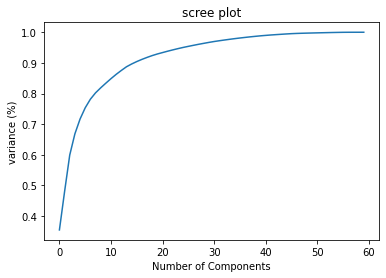

In [27]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('variance (%)') # for each component
plt.title('scree plot')
plt.show()

**From the above curve we can see that if we take 12 or 13 components, it covers almost 85% of the data**

In [28]:
PCA = PCA(n_components=12)
new_data = PCA.fit_transform(scaled_df)

In [29]:
principal_df = pd.DataFrame(data = new_data,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12'])

In [30]:
principal_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12
0,16.560098,-4.457197,19.020576,9.503217,10.370921,18.548041,6.323697,13.644616,3.895766,0.204945,-1.931727,-1.481185
1,13.777452,-2.842680,14.839343,7.451022,3.725071,13.042759,1.803455,9.674330,-0.739758,0.458726,-0.876385,-0.760112
2,15.063401,-5.634000,15.876451,7.582242,9.318195,16.396418,5.528910,10.478291,1.841897,-0.875090,-1.466327,0.278460
3,-4.357141,-0.809722,25.902083,-10.869587,5.315743,10.439421,4.698516,5.031873,-4.322412,-0.925799,-0.751523,-0.616119
4,14.744780,-4.504032,16.371512,7.946230,9.471739,17.574922,5.059590,10.440185,2.002562,-1.311881,-0.731840,-1.659457
...,...,...,...,...,...,...,...,...,...,...,...,...
18273,-6.133250,1.821333,-4.533856,-2.714810,-0.402446,1.730766,1.239105,2.605483,0.562894,0.975350,-0.550646,0.773966
18274,-5.657825,1.225111,-4.798507,-2.979400,1.186065,1.369418,1.577289,2.101710,0.429283,0.505865,1.664332,-1.056344
18275,-4.056414,1.065892,-3.637015,-1.537794,-0.441486,0.526935,2.276781,1.237614,0.349937,0.978127,-1.244892,-0.899004
18276,-3.791256,0.625281,-3.278154,-1.498426,0.076765,0.627018,1.724602,0.377798,0.158590,0.270273,0.370606,-1.429997


In [31]:
from sklearn.cluster import KMeans

### Elbow method to find K value

In [32]:
# Using elbow method to find the K value
wcss=[]
for i in range (1,11):
    Kmeans =KMeans(n_clusters=i,random_state=42)
    Kmeans.fit(principal_df)
    wcss.append(Kmeans.inertia_) # wcss values.
    # Kmeans.inertia_ which is nothing but our wcss value

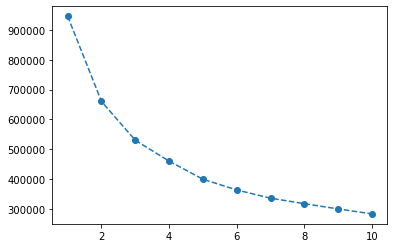

In [33]:
plt.plot( range(1,11), wcss, linestyle = 'dashed',marker = 'o')

We've decided to choose 4 clusters from the graph above because it seems like a reasonable and balanced choice.

In [34]:
kmeans1 = KMeans(n_clusters = 4, random_state = 40)
clusters = kmeans1.fit_predict(principal_df)

In [35]:
kmeans1.labels_

array([3, 3, 3, ..., 0, 0, 0])

In [36]:
data['clusters'] = clusters

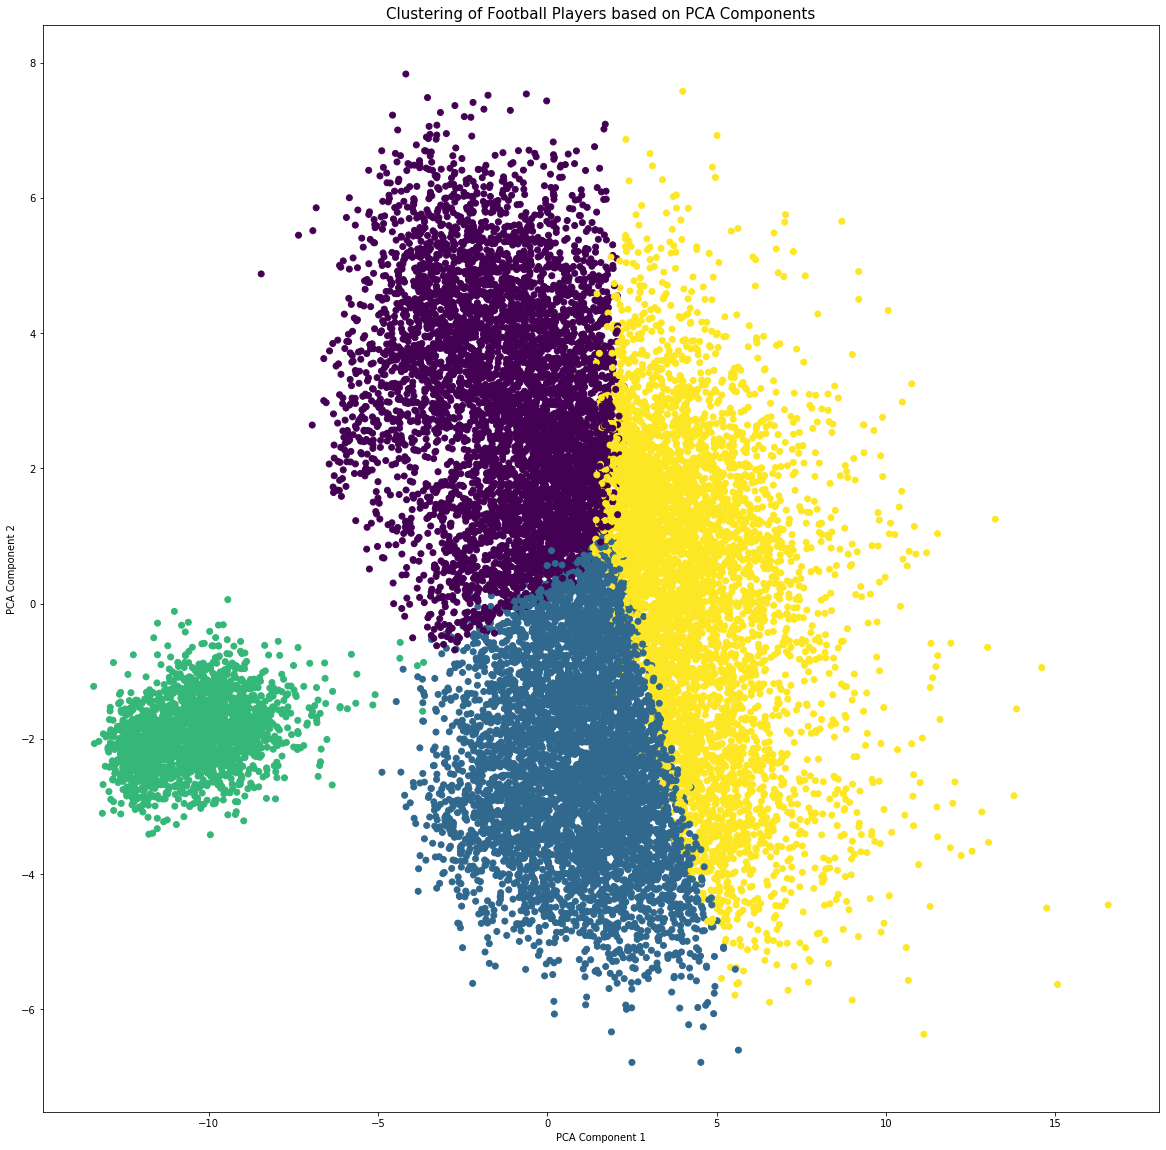

In [37]:
plt.figure(figsize=(20,20))
plt.scatter(principal_df['pc1'], principal_df['pc2'], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering of Football Players based on PCA Components', fontsize=15)
# plt.colorbar()
plt.show()

**In the presented Scatterplot we can see clusteres made by the model. based on corresponding to the unique skillset of individual players.**

**More than 18000 points are there in the above plot, clusters made by the model is for each player it includes from poor skillset players to advance level players. Understanding this scatterplot is bit complex due to large number of datapoints**

**To refine our focus and extract insights about players with exceptional abilities, a filtering process was implemented. Specifically, the dataset was filtered to include only those players whose overall performance score falls below the 75th percentile. This strategic filtering allowed us to concentrate solely on players who demonstrate a high degree of skill and proficiency.**

In [38]:
data['overall'].unique

<bound method Series.unique of 0        94
1        93
2        92
3        91
4        91
         ..
18273    48
18274    48
18275    48
18276    48
18277    48
Name: overall, Length: 18278, dtype: int64>

In [39]:
data.loc[data['overall']<75]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,clusters
2121,236772,https://sofifa.com/player/236772/dominik-szobo...,D. Szoboszlai,Dominik Szoboszlai,18,2000-10-25,186,74,Hungary,FC Red Bull Salzburg,74,89,11500000,11000,"CAM, RM, CM",Right,1,4,4,Medium/Low,Lean,No,24400000.0,NaN,LM,14.0,NaN,2018-01-16,2022.0,CAM,10.0,80.0,69.0,71.0,78.0,37.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Free, Selfish, Crowd Favourite",65,67,58,72,69,79,78,77,72,80,76,83,77,68,71,72,72,69,69,74,49,32,62,72,69,75,35,38,26,10,10,13,10,6,69+2,69+2,69+2,73+2,72+2,72+2,72+2,73+2,73+2,73+2,73+2,72+2,68+2,68+2,68+2,72+2,57+2,55+2,55+2,55+2,57+2,53+2,48+2,48+2,48+2,53+2,3
2122,238067,https://sofifa.com/player/238067/nicolo-zaniol...,N. Zaniolo,Nicolò Zaniolo,19,1999-07-02,190,79,Italy,Roma,74,88,12000000,18000,"CAM, CM, RW",Left,1,3,3,Medium/Medium,Normal,No,27900000.0,NaN,CAM,22.0,NaN,2018-07-01,2024.0,NaN,NaN,73.0,66.0,68.0,76.0,59.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,Selfish,58,70,60,75,42,76,63,51,68,77,74,72,68,75,77,68,46,76,78,64,80,57,77,70,49,67,63,60,50,8,11,11,13,5,71+2,71+2,71+2,72+2,73+2,73+2,73+2,72+2,73+2,73+2,73+2,72+2,71+2,71+2,71+2,72+2,66+2,68+2,68+2,68+2,66+2,64+2,64+2,64+2,64+2,64+2,3
2123,240740,https://sofifa.com/player/240740/callum-hudson...,C. Hudson-Odoi,Callum Hudson-Odoi,18,2000-11-07,177,75,England,Chelsea,74,88,11500000,31000,"RW, LW",Right,1,3,4,High/Medium,Normal,Yes,29000000.0,NaN,SUB,20.0,NaN,2017-07-05,2020.0,NaN,NaN,85.0,64.0,67.0,81.0,30.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,"Early Crosser, Crowd Favourite",66,67,53,71,59,82,67,64,65,80,86,84,85,65,78,65,72,66,60,60,50,23,64,65,55,67,22,33,36,14,13,11,15,5,68+2,68+2,68+2,73+2,71+2,71+2,71+2,73+2,72+2,72+2,72+2,72+2,65+2,65+2,65+2,72+2,55+2,51+2,51+2,51+2,55+2,52+2,43+2,43+2,43+2,52+2,3
2124,243630,https://sofifa.com/player/243630/jonathan-davi...,J. David,Jonathan David,19,2000-01-14,177,77,Canada,KAA Gent,74,87,10500000,12000,"CF, ST, CAM",Right,1,5,3,Medium/Medium,Normal,No,22300000.0,NaN,CAM,16.0,NaN,2017-04-24,2022.0,CAM,20.0,81.0,73.0,64.0,74.0,25.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,Selfish,53,79,71,72,66,74,41,34,68,76,78,83,73,70,76,71,80,69,68,68,25,17,70,71,58,78,21,21,19,7,7,11,7,7,73+2,73+2,73+2,72+2,73+2,73+2,73+2,72+2,73+2,73+2,73+2,71+2,66+2,66+2,66+2,71+2,50+2,48+2,48+2,48+2,50+2,47+2,40+2,40+2,40+2,47+2,3
2125,241168,https://sofifa.com/player/241168/giorgi-chakve...,G. Chakvetadze,Giorgi Chakvetadze,19,1999-08-29,178,75,Georgia,KAA Gent,74,86,10000000,11000,"LM, CAM",Right,1,3,4,Medium/Medium,Lean,No,17000000.0,NaN,SUB,10.0,NaN,2017-08-30,2022.0,NaN,NaN,83.0,70.0,71.0,78.0,34.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Crowd Favourite",69,67,39,74,64,78,77,59,69,76,82,83,87,65,76,75,78,64,63,75,38,30,67,71,58,59,29,41,32,10,8,13,8,13,68+2,68+2,68+2,73+2,72+2,72+2,72+2,73+2,73+2,

In [40]:
df.describe().columns

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'release_clause_eur', 'team_jersey_number', 'contract_valid_until',
       'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_visio

In [41]:
dframe = data[['age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]

In [42]:
dframe.shape

(18278, 60)

In [43]:
# filtering the records, players have below 75 overall performance, those records are eliminated.
data1 = dframe.loc[dframe['overall']>75]

In [44]:
data1.shape

(1615, 60)

There are 1615 records who has overall performance above 75

In [45]:
data1

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,35,176,76,76,76,0,0,1,2,2,NaN,NaN,NaN,19.0,65.0,53.0,63.0,61.0,72.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,48,45,60,77,53,50,47,44,76,70,58,70,77,79,76,65,81,88,80,62,83,70,36,52,62,80,74,77,68,7,12,10,16,9
1611,31,180,71,76,76,0,0,1,3,3,NaN,NaN,NaN,11.0,76.0,76.0,61.0,73.0,33.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,61,78,77,62,77,76,62,63,55,75,73,78,62,79,56,76,55,61,69,73,57,34,72,65,64,65,31,23,22,8,14,12,16,12
1612,38,182,78,76,76,0,0,2,3,3,NaN,NaN,NaN,17.0,57.0,78.0,81.0,77.0,36.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,80,68,41,80,81,74,86,91,79,85,59,55,72,76,72,86,77,74,58,89,38,55,76,80,86,70,40,26,15,6,11,8,6,10
1613,33,194,83,76,76,0,0,2,3,2,NaN,NaN,NaN,6.0,33.0,47.0,54.0,49.0,76.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,54,39,75,64,54,45,42,35,51,60,34,32,32,71,33,70,64,71,89,42,86,71,29,44,57,65,76,78,80,16,6,13,7,13


In [46]:
data1.isnull().sum()

age                              0
height_cm                        0
weight_kg                        0
overall                          0
potential                        0
value_eur                        0
wage_eur                         0
international_reputation         0
weak_foot                        0
skill_moves                      0
release_clause_eur             104
team_jersey_number              40
contract_valid_until            40
nation_jersey_number          1141
pace                           165
shooting                       165
passing                        165
dribbling                      165
defending                      165
physic                         165
gk_diving                     1450
gk_handling                   1450
gk_kicking                    1450
gk_reflexes                   1450
gk_speed                      1450
gk_positioning                1450
attacking_crossing               0
attacking_finishing              0
attacking_heading_ac

**there are some null values present in our new dataframe**

In [47]:
# replacing nan values by their mean.
data1 = data1.fillna(data1.mean())

In [48]:
data1.isnull().sum()

age                           0
height_cm                     0
weight_kg                     0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
international_reputation      0
weak_foot                     0
skill_moves                   0
release_clause_eur            0
team_jersey_number            0
contract_valid_until          0
nation_jersey_number          0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
gk_diving                     0
gk_handling                   0
gk_kicking                    0
gk_reflexes                   0
gk_speed                      0
gk_positioning                0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dr

In [49]:
# scaling our new dataframe
scaled_data1 = scale.fit_transform(data1)

In [50]:
scaled_data1

array([[ 1.1129945 , -1.77624716, -0.70374469, ..., -0.11499756,
        -0.17045026, -0.45012685],
       [ 1.62692906,  0.70792918,  0.80379473, ..., -0.11499756,
        -0.17045026, -0.31278416],
       [-0.1718419 , -1.04560706, -1.25194085, ..., -0.11499756,
        -0.12270882, -0.31278416],
       ...,
       [ 2.65479818, -0.02271092,  0.11854954, ..., -0.47432521,
        -0.55238183, -0.35856505],
       [ 1.36996178,  1.73082532,  0.80379473, ..., -0.2176626 ,
        -0.50464038, -0.22122236],
       [ 0.85602722, -1.48399112, -1.11489181, ..., -0.32032764,
        -0.07496737, -0.45012685]])

In [51]:
Principalcomponents = pca.fit_transform(scaled_data1)

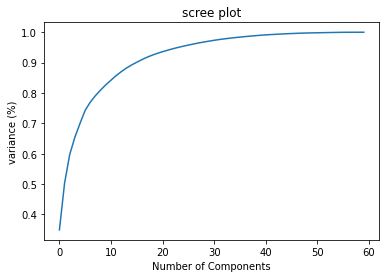

In [52]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('variance (%)') # for each component
plt.title('scree plot')
plt.show()

In [53]:
from sklearn.decomposition import PCA

# Create a PCA object
pca1 = PCA(n_components=12)

In [54]:
new_data1 = pca1.fit_transform(scaled_data1)

In [55]:
principal_data = pd.DataFrame(data=new_data1,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])

In [56]:
principal_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-8.877561,7.084145,11.402149,1.603650,-1.774593,-5.054487,-2.936881,3.242888,-0.420902,0.111467,-0.548530,-0.470558
1,-6.860199,4.715067,8.659023,3.994757,1.221038,-3.669336,-3.950726,0.563646,-0.435196,0.692362,0.465817,-0.130477
2,-8.288091,7.677221,9.168531,0.200355,-0.702546,-4.042987,-1.502282,3.866959,-1.064947,0.126888,-0.216477,0.550963
3,9.842862,6.100073,15.850724,-1.176348,0.895906,10.459544,1.772371,-0.387397,0.052942,2.320823,1.301557,-0.668287
4,-7.728139,6.613997,9.539366,0.149169,0.071084,-4.513450,-1.281592,3.075180,-0.911000,-0.096070,0.282946,-0.197384
...,...,...,...,...,...,...,...,...,...,...,...,...
1610,0.836831,-3.543205,-1.204600,-0.364157,-0.073642,0.812049,-1.401943,-0.612871,0.914721,-0.461265,-1.968286,-1.579972
1611,-0.282988,2.089283,-2.878650,1.527944,1.556995,1.302906,0.014910,1.108136,-0.059398,0.266251,0.518141,-0.557960
1612,-2.397322,2.464147,-2.801263,2.904537,-2.175701,1.347453,0.422724,0.126109,0.525970,-0.842615,-0.878882,-0.762516
1613,4.880366,-6.259649,-0.891897,3.178822,-0.471400,1.023652,0.969461,1.328585,-0.593130,0.172926,1.095316,0.789773


In [57]:
wcss2 = []
for i in range(1,11):
    Kmeans = KMeans(n_clusters=i,random_state = 32)
    Kmeans.fit(principal_data)
    wcss2.append(Kmeans.inertia_)

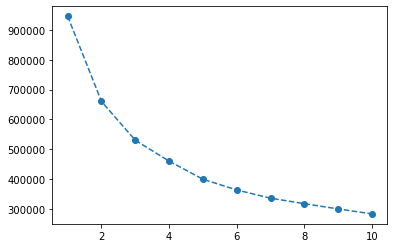

In [58]:
plt.plot(range(1,11),wcss,linestyle = 'dashed',marker = 'o')

In [59]:
kmeans = KMeans(n_clusters = 4, random_state = 76)
clusterss = kmeans.fit_predict(principal_data)

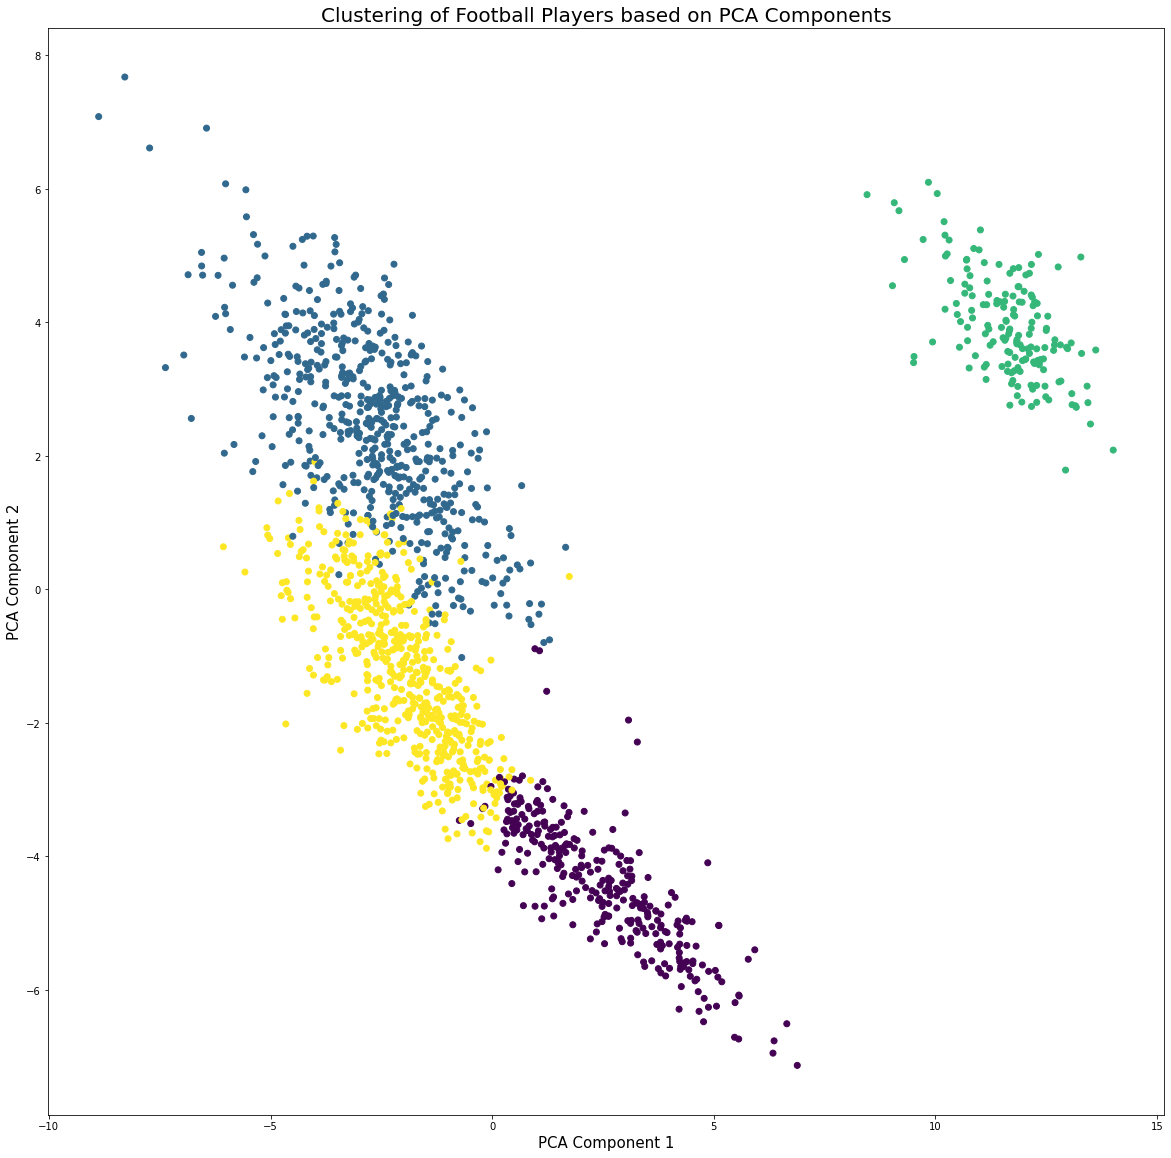

In [60]:
plt.figure(figsize=(20,20))
plt.scatter(principal_data['PC1'],principal_data['PC2'], c=clusterss, cmap='viridis')
plt.xlabel('PCA Component 1', fontsize = 15)
plt.ylabel('PCA Component 2', fontsize = 15)
plt.title('Clustering of Football Players based on PCA Components',fontsize = 20)
plt.show()

**Now, let's take a look at the clusters formed by the model, focusing on the best players.**

# Task 3:-

(i) Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?

In [61]:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,clusters
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.

In [62]:
data['nationality'].value_counts()

England                1667
Germany                1216
Spain                  1035
France                  984
Argentina               886
                       ... 
Liberia                   1
São Tomé & Príncipe       1
Puerto Rico               1
Bahrain                   1
Indonesia                 1
Name: nationality, Length: 162, dtype: int64

In [63]:
data.shape 

(18278, 105)

In [90]:
rank_list = data['nationality'].value_counts()[:10]
rank_list

England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: nationality, dtype: int64

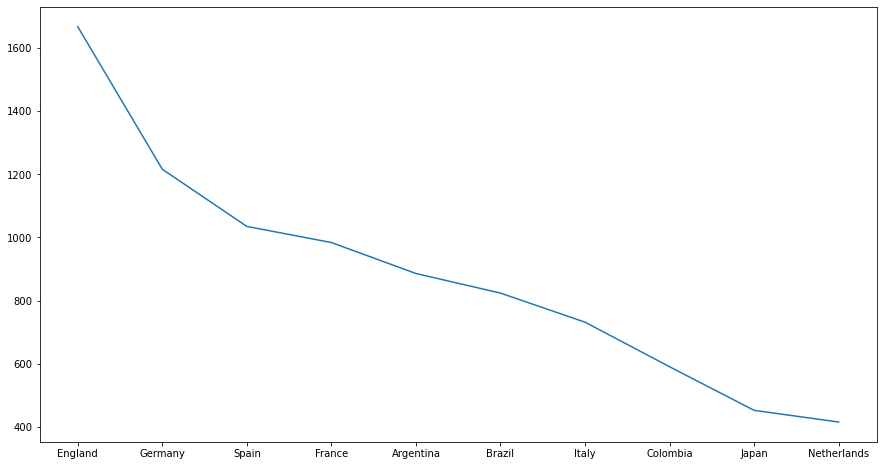

In [91]:
plt.figure(figsize=(15,8))
plt.plot(rank_list)

<BarContainer object of 10 artists>

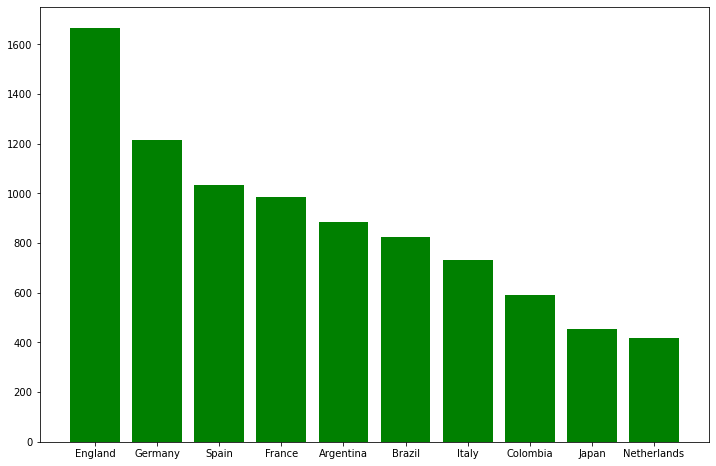

In [66]:
plt.figure(figsize=(12,8))
plt.bar(list(data['nationality'].value_counts()[0:10].keys()),list(data['nationality'].value_counts()[0:10]),color='g')

**here's the list of the top 10 countries that produce the most football players**
1. England: 1667 players
2. Germany: 1216 players
3. Spain: 1035 players
4. France: 984 players
5. Argentina: 886 players
6. Brazil: 824 players
7. Italy: 732 players
8. Colombia: 591 players
9. Japan: 453 players
10. Netherlands: 416 players

## Task 3:-

**(ii) Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?**

<AxesSubplot:xlabel='age', ylabel='Density'>

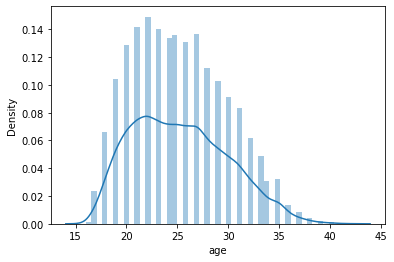

In [68]:
sns.distplot(data['age'],kde=True,hist = True)

Text(0.5, 1.0, 'Distribution of Overall Rating vs. Age of Players')

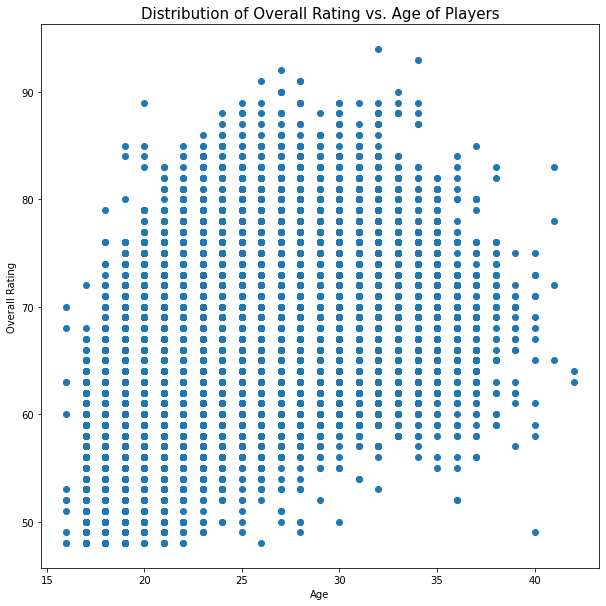

In [67]:
plt.figure(figsize = (10,10))
plt.scatter(x=data['age'],y=data['overall'])
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.title('Distribution of Overall Rating vs. Age of Players',fontsize = 15)

**As seen in the distribution above, players tend to stop improving their performance or overall ratings after the age of 34 or 35.**

## Task 3:-

**(iii) Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger?**

In [72]:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,clusters
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.

In [74]:
data['team_position'].value_counts()

SUB    7820
RES    2958
GK      662
RCB     660
LCB     660
RB      560
LB      560
ST      458
RCM     411
LCM     411
RM      399
LM      398
CAM     311
RDM     244
LDM     242
RS      195
LS      195
CDM     181
LW      162
RW      161
CB      100
CM       76
RWB      58
LWB      58
RAM      23
LAM      23
RF       19
LF       19
CF       14
Name: team_position, dtype: int64

In [75]:
offensive_positions = ['ST','RS','LS','RW','LW']

ST: center striker

RS: right striker

LS: left striker

RW: right winger

LW: left winger

In the problem statement they have only mentioned striker, there are three type of stricker so i considered all three types of strickers.

In [76]:
task3 = data[data['team_position'].isin(offensive_positions)]

In [77]:
task3

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,clusters
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,3
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3,3
9,209331,https://sofifa.com/player/209331/mohamed-salah...,M. Salah,Mohamed Salah Ghaly,27,1992-06-15,175,71,Egypt,Liverpool,90,90,80500000,240000,"RW, ST",Left,3,3,4,High/Medium,PLAYER_BODY_TYPE_25,Yes,148900000.0,"#Speedster, #Dribbler, #Acrobat, #Clinical Fin...",RW,11.0,NaN,2017-07-01,2023.0,RW,10.0,93.0,86.0,81.0,89.0,45.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",79,90,59,84,79,89,83,69,75,89,94,92,91,92,88,80,69,85,73,84,63,55,92,84,77,91,38,43,41,14,14,9,11,14,84+3,84+3,84+3,88+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,87+3,81+3,81+3,81+3,87+3,70+3,67+3,67+3,67+3,70+3,66+3,57+3,57+3,57+3,66+3,3
10,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé,20,1998-12-20,178,73,France,Paris Saint-Germain,89,95,93500000,155000,"ST, RW",Right,3,4

In [81]:
average_wages = task3.groupby('team_position')['wage_eur'].mean()

In [82]:
average_wages

team_position
LS    14338.461538
LW    23308.641975
RS    13656.410256
RW    21024.844720
ST    16451.965066
Name: wage_eur, dtype: float64

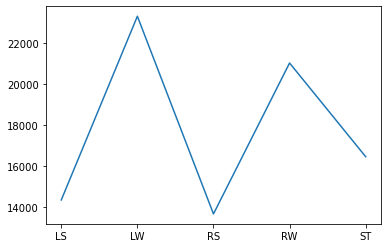

In [84]:
plt.plot(average_wages)

<BarContainer object of 5 artists>

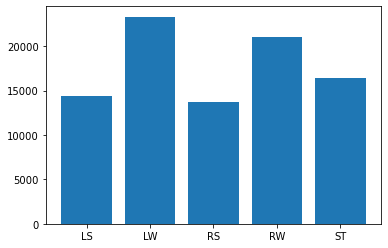

In [87]:
plt.bar(list(average_wages.keys()), list(average_wages))

"We are analyzed which type of offensive players among strikers (including Striker, Right Winger, and Left Winger) tend to receive the highest average pay based on their 'team position'." As we can see on the above Barplot

**Left Wingers(LW) are tends to paid the highest pay**

1. Left Wingers (LW) receive the highest pay.
2. Right Wingers (RW) come next in terms of pay.
3. Center Strikers (ST) follow as the next highest-paid group.
4. After ST, Left Strikers (LS) receive the most pay.
5. Following LS, Right Strikers (RS) tend to receive the highest pay.

In [89]:
data.shape

(18278, 105)

# Challenges Faced:

1. Data Volume: Managing a dataset with numerous attributes and a large number of players can be challenging, both in terms of data preprocessing and computational resources.

2. There are 105 Features present in the dataframe, it was difficult to understand each and every feature for further processes

3. I took only numerical features, there were 60 numerical features, it was hard to understand each and every feature, since 60 i had to take for further analysis.

4. I applied PCA on top of it to reduce the number of features, During PCA i notice i lost 10% - 15% of the data.

5. It was hard to do domain analysis for 105 features, understanding each and every feature's importance for each and every tasks, since we have 3 tasks in the problem statement.

6. i used elbow method to find the K value, While finding the K value for clustering i visualized the wcss vs number of K values. By looking output plot it was very difficult to find the K value, so i took 4 as my K value, because it seems to be perfect for this problem.

7. Clustering Selection: Determining the optimal number of clusters can be tricky. In our case,i chose four clusters based on the visual representation, but selecting the right number can be an iterative process.

8. After clustering i visualized the clusters, here also it was hard to understand the datapoints because in the dataframe there were 18000+ records were there.

9. So i filtered the number of records to take only top performed players. after that again i did clustering on top of it.

10. in Task 3 there were three questions, all three are tricky type of questions. in third question they have only mentioned striker, i didn't understood what to take because there were three types of strikers so took all three types of strikers for futher process

# 12. Conclusion

"In this FIFA player analysis, we delved into a wide range of player attributes, including age, height, overall performance, potential, and more. Key insights revealed that the majority of players are aged between 20 to 25 years, with very few continuing their careers beyond 35. Most players fall within the height range of 170 to 190 centimeters and weigh between 65 to 85 kilograms. The overall and potential ratings exhibit a normal distribution, with the majority of players clustered between 60 to 75. Notably, players with exceptional performance (above 80 overall) command higher wages and possess greater market value. We applied clustering to identify player groups based on their skillsets and identified that, among offensive players, Left Wingers (LW) tend to earn the highest salaries. Challenges in this project included handling a vast dataset and interpreting complex scatterplots."

                                  ******************************